在这部分的练习中，你将建立一个逻辑回归模型来预测一个学生是否能进入大学。假设你是一所大学的行政管理人员，你想根据两门考试的结果，来决定每个申请人是否被录取。你有以前申请人的历史数据，可以将其用作逻辑回归训练集。对于每一个训练样本，你有申请人两次测评的分数以及录取的结果。为了完成这个预测任务，我们准备构建一个可以基于两次测试评分来评估录取可能性的分类模型。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = 'ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
data.head() #查看前5行数据


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
data.describe()
"""
std : 标准差
"""

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


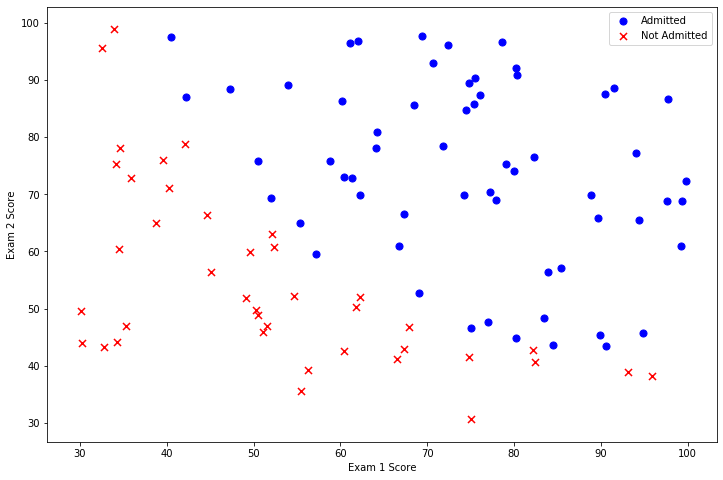

In [10]:
positive = data[data['Admitted'].isin([1])] # 将Admitted列 中的为1 的标记为positive
negative = data[data['Admitted'].isin([0])] # 将Admitted列 中的为0 的标记为negitive

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x = positive['Exam 1'],y = positive['Exam 2'],s = 50,color='b',marker = 'o',label = 'Admitted')
ax.scatter(x = negative['Exam 1'],y = negative['Exam 2'],s = 50,color='r',marker = 'x',label = 'Not Admitted')
plt.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()


In [11]:
def get_X(df):
    ones = pd.DataFrame({'ones':np.ones(len(df))})
    data = pd.concat([ones,df],axis=1)
    return np.array(data.iloc[:,:-1])#返回ndarray

def get_y(df):
    return np.array(data.iloc[:,-1])

def normalize_feature(df):
    return df.apply(lambda column:(column-column.mean())/column.std()) #特征缩放

X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)


(100, 3)
(100,)


In [12]:
def sigmoid(z):
    return 1 /(1 + np.exp(-z))


[]

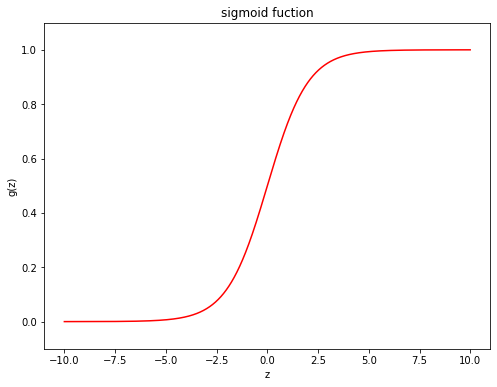

In [15]:
# 检查sigmoid
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(np.arange(-10,10,step=0.01),sigmoid(np.arange(-10,10,step=0.01)),c='r')
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z')
ax.set_ylabel('g(z)')
ax.set_title('sigmoid fuction')

plt.plot()


### Cost fuction

In [16]:
theta=np.zeros(3)
theta #array([0., 0., 0.]),array multiply matrix, auto-become theta --> theta.T

def cost(theta,X,y):
    return np.mean(-y *np.log(sigmoid(X@theta)) - (1-y)*np.log(1-sigmoid(X@theta)))
# @连接的两项表示对应位置相乘后相加
cost(theta,X,y)
#0.6931471805599453


0.6931471805599453

### Gradient

In [19]:
def gradient(theta,X,y):
    return ( X.T @ (sigmoid(X @ theta) - y)) / len(X)
gradient(theta,X,y)
#array([ -0.1       , -12.00921659, -11.26284221])


array([ -0.1       , -12.00921659, -11.26284221])

### Learning θ parameters
我们可以用SciPy的“optimize”命名空间：SciPy's truncated newton（TNC）实现寻找最优参数。  
只需传入cost函数，已经所求的变量theta，和梯度，func = cost表示传入我们的cost函数，x0=theta，表示传入初始点即theta的初值

In [21]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X,y), method='Newton-CG',jac=gradient)
res
# 此时的x=[-25.15887187, 0.20621202, 0.20145168]即为theta的最优解

     fun: 0.20349789025582204
     jac: array([ 3.40328379e-06, -4.97373178e-04, -3.98551412e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 28
    njev: 237
  status: 0
 success: True
       x: array([-25.12573622,   0.20594701,   0.20118353])

### Evaluating logistic regression

In [22]:
def predict(theta, X):
    probability = sigmoid( X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]  # return a list
    
final_theta = res.x
y_pridict = predict(final_theta, X)


#### 用skearn中的方法来检验

In [23]:
from sklearn.metrics import classification_report
print(classification_report( y,y_pridict))
'''
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.90      0.91        61

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100
'''


              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



'\n              precision    recall  f1-score   support\n\n           0       0.85      0.87      0.86        39\n           1       0.92      0.90      0.91        61\n\n    accuracy                           0.89       100\n   macro avg       0.88      0.89      0.88       100\nweighted avg       0.89      0.89      0.89       100\n'

In [24]:
coef = -(res.x / res.x[2]) 
coef
#array([124.88787185,  -1.02363018,  -1.        ])


array([124.8896297,  -1.0236773,  -1.       ])

In [25]:
x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x
data.describe()


,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


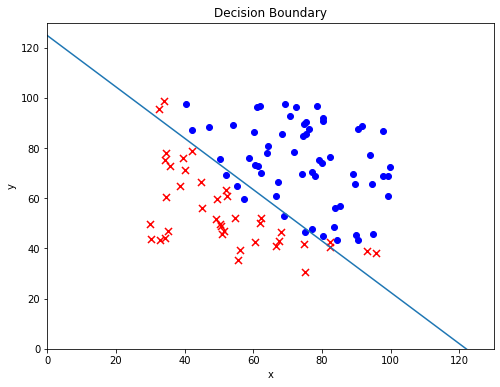

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['Exam 1'], positive['Exam 2'], c='b', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x, y)
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Decision Boundary')
plt.show()


# bilibili

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report #这个包是评价报告


In [2]:
data = pd.read_csv('ex2data1.txt',
                   names=['exam1','exam2','admitted'])

data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()
# 详细些

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


C:\Users\fsf15\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


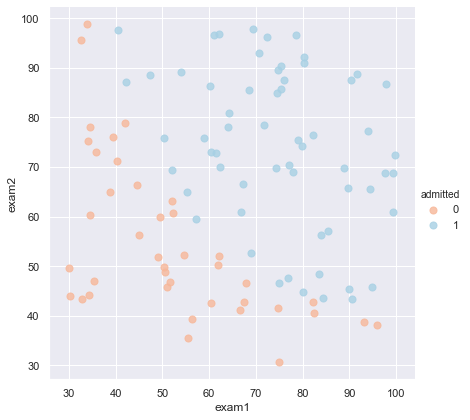

In [4]:
sns.set(context='notebook',style='darkgrid',
       palette=sns.color_palette('RdBu',2))
sns.lmplot('exam1','exam2',hue='admitted',data=data,
          size=6,fit_reg=False, scatter_kws={'s':50})
plt.show()

In [7]:
def get_X(df): #读取特征 
    """
    use concat to add intersect feature to avoid side effect
    not efficient for big dataset though 
    """
    ones = pd.DataFrame({'ones':np.ones(len(df))})
    data = pd.concat([ones,df],axis=1)
    return data.iloc[:,:-1].values

def get_y(df):
    '''
    assume the last column is the target
    '''
    return np.array(df.iloc[:,-1])

def normalize_feature(df):
    """applies function along input axis(default 0) of DataFramme"""
    return df.apply(lambda column: (column-column.mean())/column.std())

    

In [8]:
X = get_X(data)
print(X.shape)
y = get_y(data)
print(y.shape)

(100, 3)
(100,)


# sigmoid 函数

<img style="float: left;" src="sigmoid.png" width="60%">

In [10]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))


[]

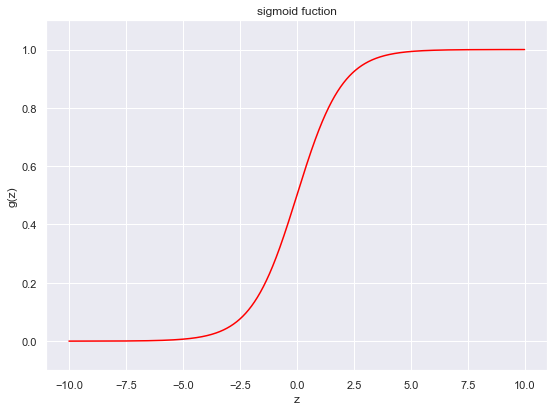

In [11]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(np.arange(-10,10,step=0.01),sigmoid(np.arange(-10,10,step=0.01)),c='r')
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z')
ax.set_ylabel('g(z)')
ax.set_title('sigmoid fuction')

plt.plot()

<img style="float: left;" src="cost function.png" width="60%">

In [13]:
theta=np.zeros(3)
theta #array([0., 0., 0.])

def cost(theta,X,y):
    return np.mean(-y *np.log(sigmoid(X@theta)) - (1-y)*np.log(1-sigmoid(X@theta)))
# @连接的两项表示对应位置相乘后相加
cost(theta,X,y)

0.6931471805599453

<img style="float: left;" src="gradient.png" width="60%">

In [14]:
def gradient(theta,X,y):
    return ( X.T @ (sigmoid(X @ theta) - y)) / len(X)
gradient(theta,X,y)
#array([ -0.1       , -12.00921659, -11.26284221])


array([ -0.1       , -12.00921659, -11.26284221])

In [16]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X,y), method='Newton-CG',jac=gradient)
res

     fun: 0.20349789025582204
     jac: array([ 3.40328379e-06, -4.97373178e-04, -3.98551412e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 28
    njev: 237
  status: 0
 success: True
       x: array([-25.12573622,   0.20594701,   0.20118353])